In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# 构造数据
np.random.seed(0)
x = np.linspace(-10, 10, 100)
y = x**2 + 2*x + 1 + np.random.normal(0, 20, 100) 

x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

Epoch [100/1000], Loss: 5718.3809
Epoch [200/1000], Loss: 4657.0796
Epoch [300/1000], Loss: 4378.5693
Epoch [400/1000], Loss: 4305.4819
Epoch [500/1000], Loss: 4286.3027
Epoch [600/1000], Loss: 4281.2690
Epoch [700/1000], Loss: 4279.9482
Epoch [800/1000], Loss: 4279.6016
Epoch [900/1000], Loss: 4279.5107
Epoch [1000/1000], Loss: 4279.4873


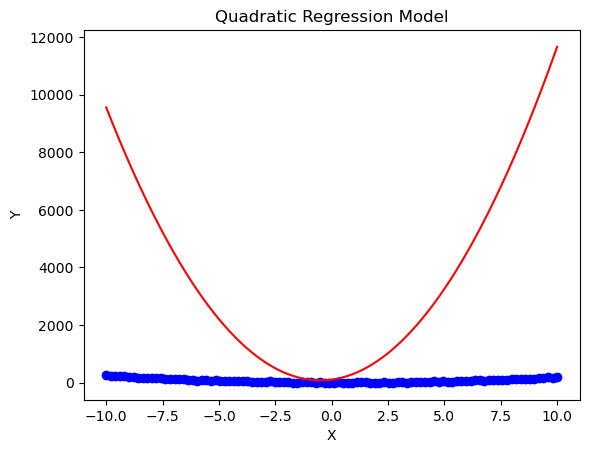

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 定义模型
class QuadraticRegressionModel(nn.Module):
    def __init__(self):
        super(QuadraticRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 3)  # 输出三个值：a, b, c

    def forward(self, x):
        return self.linear(x)

# 初始化模型、损失函数和优化器
model = QuadraticRegressionModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 生成一些示例数据
np.random.seed(0)  # 设置随机种子以获得可重复的结果
x = np.linspace(-10, 10, 100)  # 生成x值
a_true, b_true, c_true = 2, -3, 5  # 真正的二次方程系数
y = a_true * x**2 + b_true * x + c_true + np.random.normal(0, 10, x.shape)  # 添加一些噪声

# 将数据转换为PyTorch张量
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# 训练模型
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    predictions = model(x_tensor)
    loss = criterion(predictions, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 测试模型
with torch.no_grad():
    predicted = model(x_tensor)
    a, b, c = predicted[0]  # 获取模型输出的系数

# 绘制原始数据点和拟合的二次曲线
plt.scatter(x, y, color='blue')  # 绘制原始数据点

# 生成拟合曲线的数据点
x_fit = np.linspace(-10, 10, 400)
y_fit = a.item() * x_fit**2 + b.item() * x_fit + c.item()
plt.plot(x_fit, y_fit, color='red')  # 绘制拟合的二次曲线

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Quadratic Regression Model')
plt.show()